In [1]:
import numpy as np
import kpm
import wget
import os
import pickle

In [2]:
url = 'https://www.emilyjgriffith.com/s/'
#if(os.path.isfile('lnqs.npy')==False): wget.download(url+'lnqs.npy') # W22 q vectors
#if(os.path.isfile('lnAs.npy')==False): wget.download(url+'lnAs.npy') # W22 A vectors
#if(os.path.isfile('alldata_train.npy')==False): wget.download(url+'alldata_train.npy') # APOGEE stellar abundances
#if(os.path.isfile('allivars_train.npy')==False): wget.download(url+'allivars_train.npy') # APOGEE stellar abundance inverse variance

In [3]:
elements  = np.array(['Mg','O','Si','S','Ca','CN','Na','Al','K','Cr','Fe','Ni','Mn','Co','Ce'])
alldata = np.load('alldata_train.npy')
allivars = np.load('allivars_train.npy')

data = kpm.abund_data(elements, alldata, allivars)

In [4]:
data

kpm.abund_data{
    Elements ------------ > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Number of elements -- > 15
    Number of stars ----- > 48659
}

In [5]:
fixed = kpm.fixed_params(data, K=2, J=3)

In [6]:
fixed

kpm.fixed_params{
    K ------------------- > 2
    Processes ----------- > ['CC' 'Ia']
    CC element ---------- > Mg
    Ia element ---------- > Fe
    q_CC_Fe ------------- > 0.4
    J ------------------- > 3
    Lambda a ------------ > 1000000.0
    Lambda c ------------ > 1000.0
    Lambda_d ------------ > 1000.0
    xlim ---------------- > [-0.5818765   0.36397953]
}

In [7]:
# knot_xs = np.array([[-0.8, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.6],
#                     [-0.8, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.6]])

In [8]:
# fixed.knot_xs = knot_xs

In [14]:
data, fit = kpm.initialize_2(data, fixed)

A-step(): fixing large elements: 97309 21.764587
A-step(): fixing small elements: 7 -590.60565
initialize_2(): [0.]
q-step(): fixing large elements: 1 1.4843309
q-step(): fixing small elements: 12 -19.973597
A-step(): fixing bad elements: 4028
A-step(): fixing large elements: 61632 17795048.0
A-step(): fixing small elements: 105 -2838.25
initialize_2(): [0.]


In [19]:
np.exp(fit.lnq_pars[0,:,0])

array([1.000000e+00, 1.234098e-04, 1.234098e-04], dtype=float32)

In [20]:
# Fix this filename
file = '/Users/emilygriffith/KProcessModel/API/test_fits'
data, fixed, fit = kpm.run_kpm(data, fixed, file, 'MW_disk', N_itters=3, overwrite=True)

A-step(): fixing large elements: 97308 21.764587
A-step(): fixing small elements: 8 -7414.5757
initialize_2(): [0.]
q-step(): fixing large elements: 1 2.3797398
q-step(): fixing small elements: 9 -16.118095
A-step(): fixing large elements: 52019 17127.336
A-step(): fixing small elements: 406 -6282192000.0
initialize_2(): [-0.2666757]
File /Users/emilygriffith/KProcessModel/API/test_fits/MW_disk_K2_qccFe0.4_0.out exists, but overwriting
Aq-step(): q-step WARNING: objective function got worse: 23144132.0 86413400.0
A-step(): fixing bad elements: 18
A-step(): fixing large elements: 46160 3919.1772
A-step(): fixing small elements: 135 -5418364000.0
23170062.0 23144132.0 23144132.0 23144128.0 22558578.0
Aq-step(): we took a step! -4.0 22558578.0 611484.0
q-step(): fixing large elements: 1 2.6245594
Aq-step(): q-step WARNING: objective function got worse: 22537138.0 117577540.0
A-step(): fixing bad elements: 2
A-step(): fixing large elements: 46066 1743.8579
A-step(): fixing small elements: 

In [35]:
np.exp(fit.lnq_pars[0,:,10])

array([3.9999998e-01, 1.2340980e-04, 1.2340980e-04], dtype=float32)

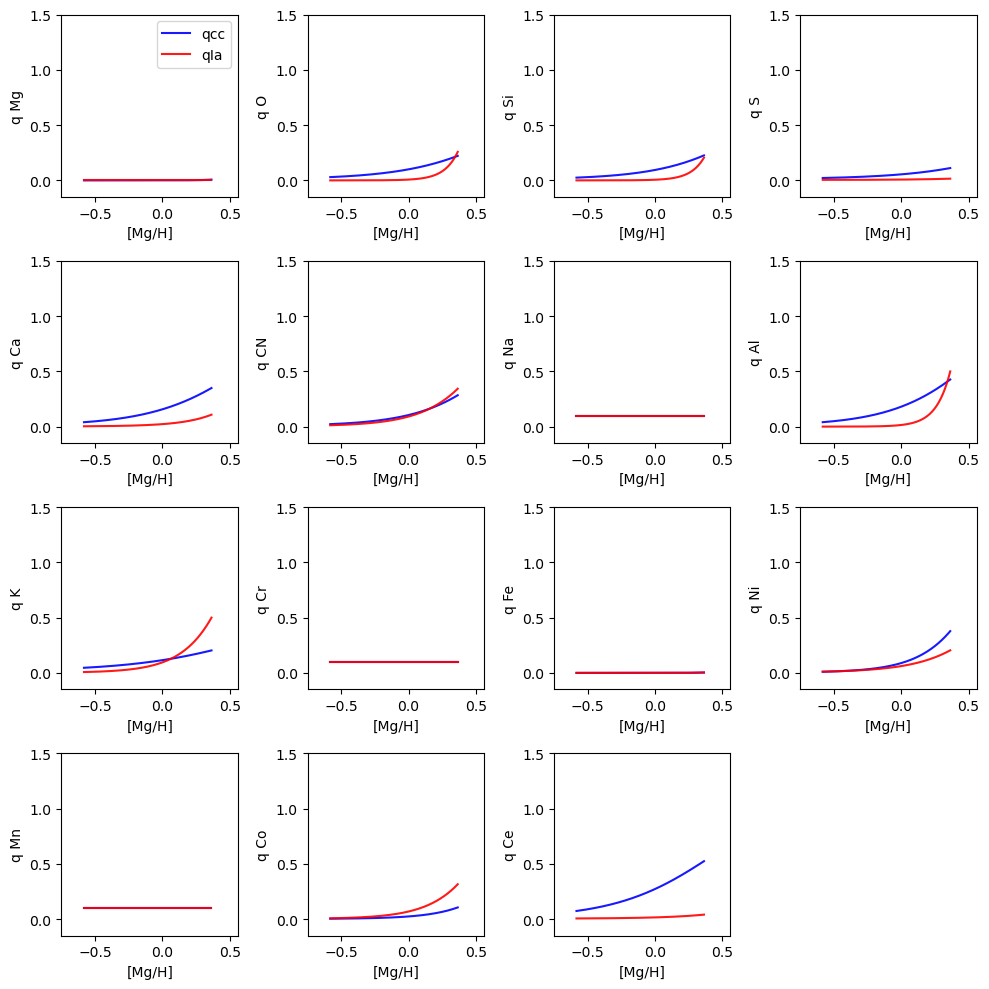

In [11]:
kpm.plot_qs(data, fixed, fit)

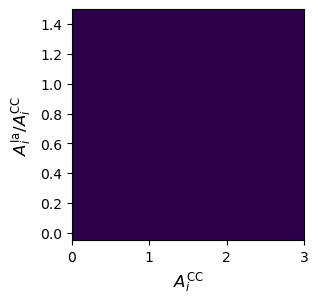

In [12]:
kpm.plot_As(fit)

/Users/emilygriffith/KProcessModel/API/kpm/visualize.py:80: RuntimeWarning: divide by zero encountered in divide
  synthnoise = _RNG2.normal(size=synthdata.shape) / data.sqrt_allivars


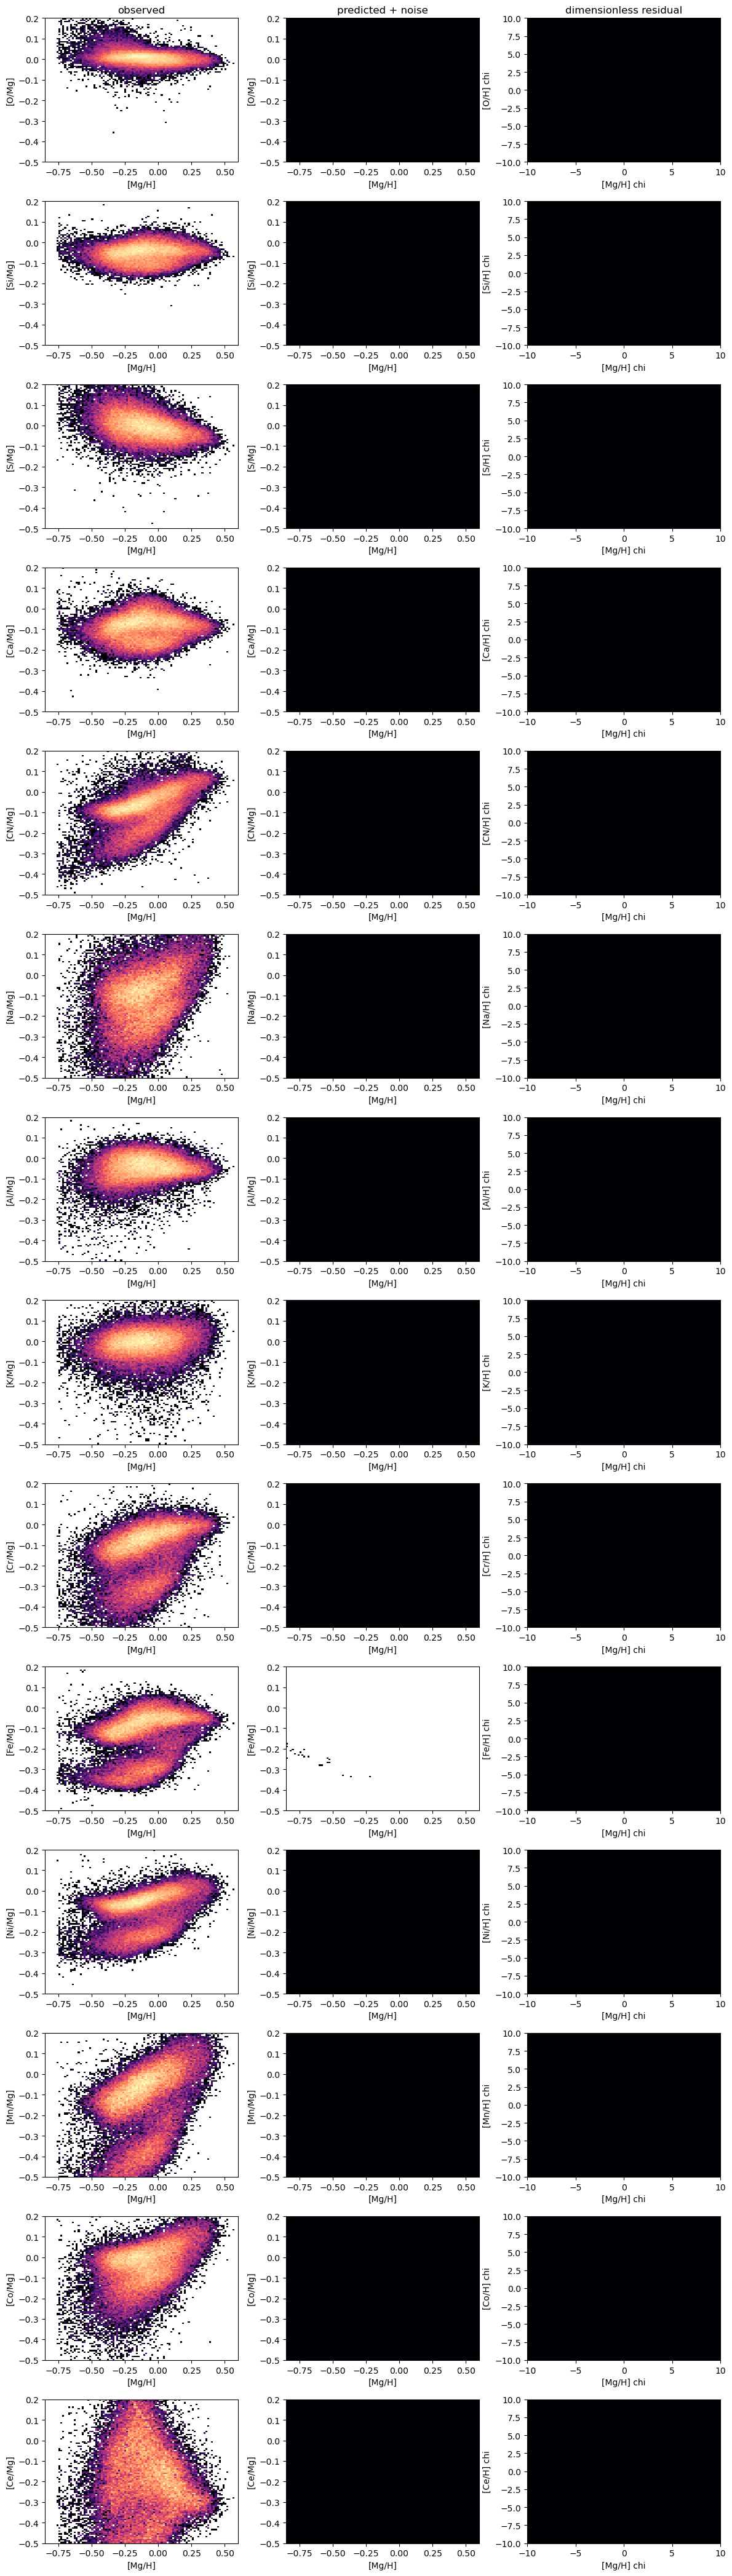

In [13]:
kpm.plot_model_abundances(data, fixed, fit, noise=True)